## 科比投篮数据可视化项目

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

#### 各个特征值的含义说明:

- action_type 进攻方式（更具体）
    - ('跳投','上篮','扣篮','补篮','勾手','擦板')
- combined_shot_type 进攻方式
- game_event_id 比赛时间id
- game_id 比赛ID
- lat 投篮点(维度)
- loc_x 投篮点
- loc_y 投篮点
- lon 投篮点(经度)_
- minutes_remaining 单节剩余时间（分钟）
- period 表示第几节 (5,6,7节都是加时赛)
- playoffs 是否是季后赛
- season 赛季
- seconds_remaining 剩余时间（秒）
- shot_distance 投篮距离
- shot_made_flag 是否进球
- shot_type 两分球或三分球
- shot_zone_area 投篮区域
- shot_zone_basic 投篮区域（更具体）
    - ('中距离','进攻有理区','底线之外的三分',
    -   '除进攻有理区外的禁区','右边底线三分','左边底线三分','后场')
- shot_zone_range 投篮范围
- team_id 球队ID
- team_name 球队名称
- game_date 比赛日期
- matchup 比赛双方
- opponent 对手
- shot_id 投篮ID


### 读取科比投篮数据

In [2]:
df = pd.read_csv('data/kobe.csv')
df.shape

(30697, 25)

In [3]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


### 1, 分别根据投篮点坐标(loc_x, loc_y) 和 投篮经纬度(lat, lon)画出科比投篮的位置
- (2个散点图， 使用子图) 

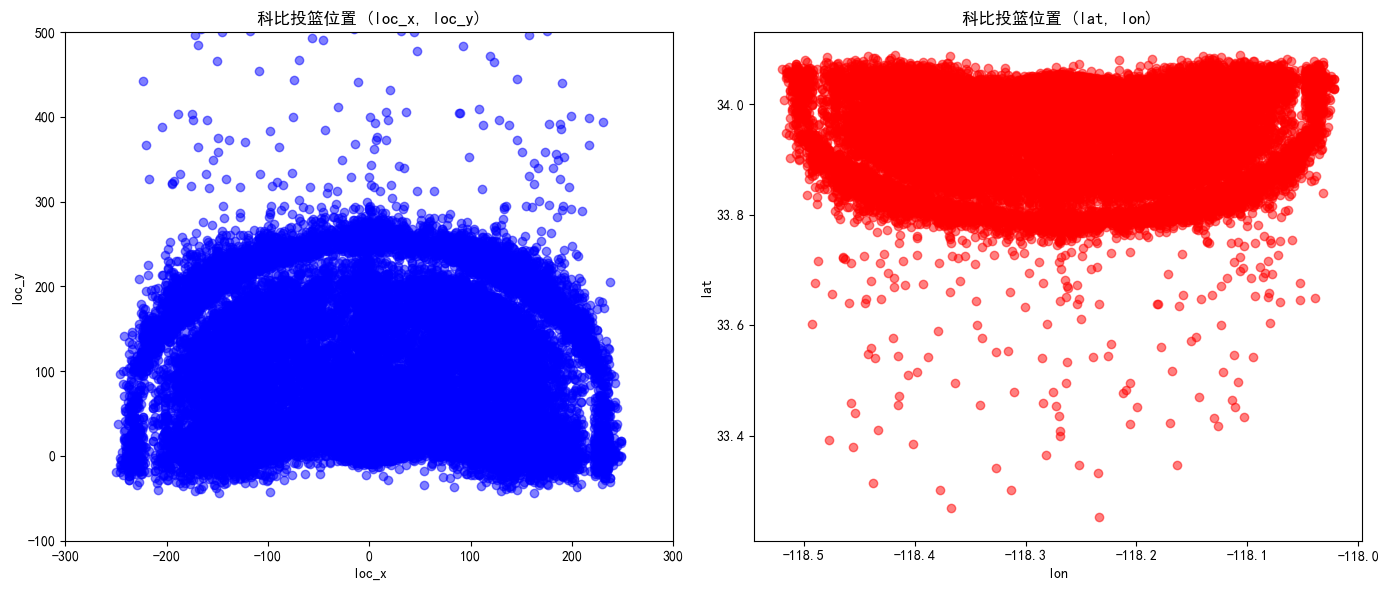

In [4]:
# 创建两个子图
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# 第一个子图：根据 loc_x, loc_y 绘制投篮位置
axes[0].scatter(df['loc_x'], df['loc_y'], alpha=0.5, c='blue')
axes[0].set_title('科比投篮位置 (loc_x, loc_y)')
axes[0].set_xlabel('loc_x')
axes[0].set_ylabel('loc_y')
axes[0].set_xlim(-300, 300)  # 设置合理的位置限制
axes[0].set_ylim(-100, 500)

# 第二个子图：根据 lat, lon 绘制投篮位置
axes[1].scatter(df['lon'], df['lat'], alpha=0.5, c='red')
axes[1].set_title('科比投篮位置 (lat, lon)')
axes[1].set_xlabel('lon')
axes[1].set_ylabel('lat')

# 调整显示
plt.tight_layout()
plt.show()


### 2. 画图对比科比的出手方式action_type的次数,得出科比哪种出手方式最多
- 使用条形图
- 画图显示前10个即可

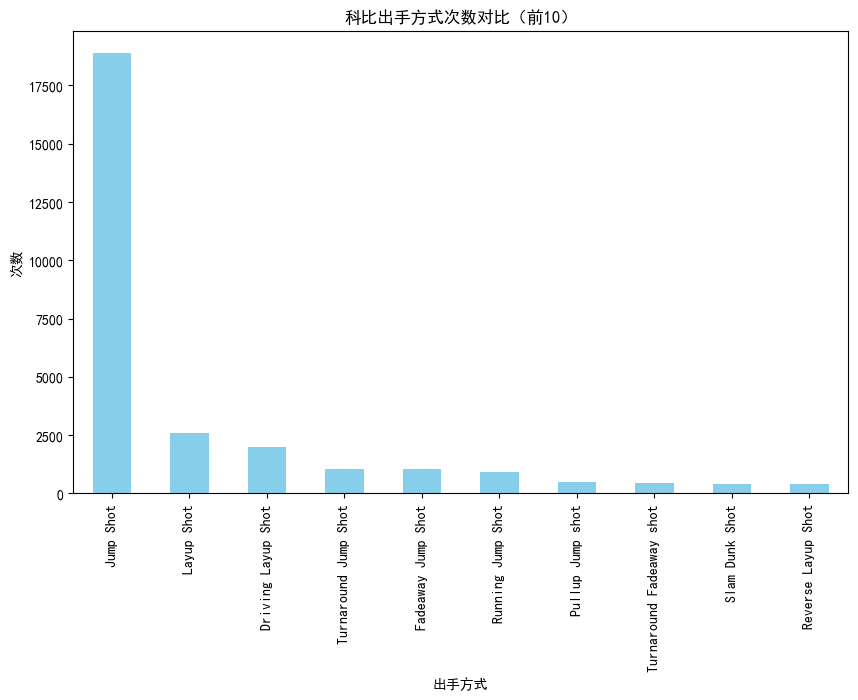

In [5]:
# 统计每种出手方式的次数
action_counts = df['action_type'].value_counts().head(10)

# 创建条形图
plt.figure(figsize=(10, 6))
action_counts.plot(kind='bar', color='skyblue')

# 设置标题和标签
plt.title('科比出手方式次数对比（前10）')
plt.xlabel('出手方式')
plt.ylabel('次数')

# 显示图形
plt.show()


### 3. 科比各种投篮方式命中率 可视化对比 
- combined_shot_type 投篮方式

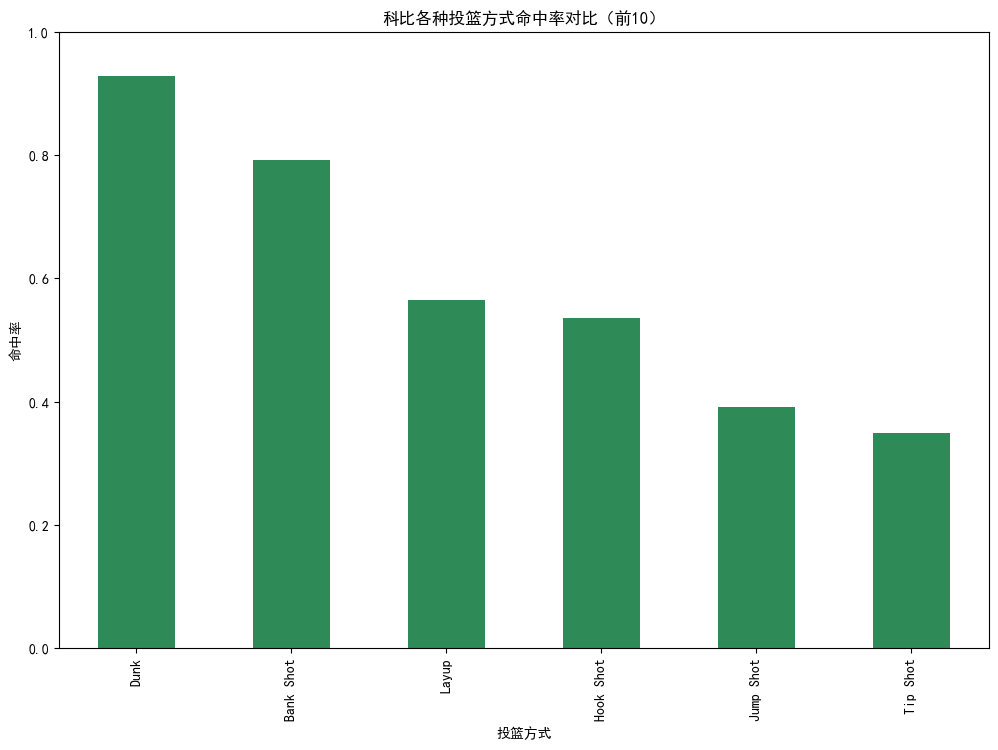

In [7]:
# 计算每种投篮方式的命中率
shot_type_hit_rate = df.groupby('combined_shot_type')['shot_made_flag'].mean()

# 取前10种投篮方式
top_10_shot_types = shot_type_hit_rate.sort_values(ascending=False).head(10)

# 创建条形图
plt.figure(figsize=(12, 8))
top_10_shot_types.plot(kind='bar', color='seagreen')

# 设置标题和标签
plt.title('科比各种投篮方式命中率对比（前10）')
plt.xlabel('投篮方式')
plt.ylabel('命中率')

# 调整y轴范围到0到1之间
plt.ylim(0, 1)

# 显示图形
plt.show()


### 4. 科比在各区域投篮对比 
- 画散点图，并使用cmap="rainbow"区分颜色
- 画3个子图： shot_zone_basic， shot_zone_range， shot_zone_area

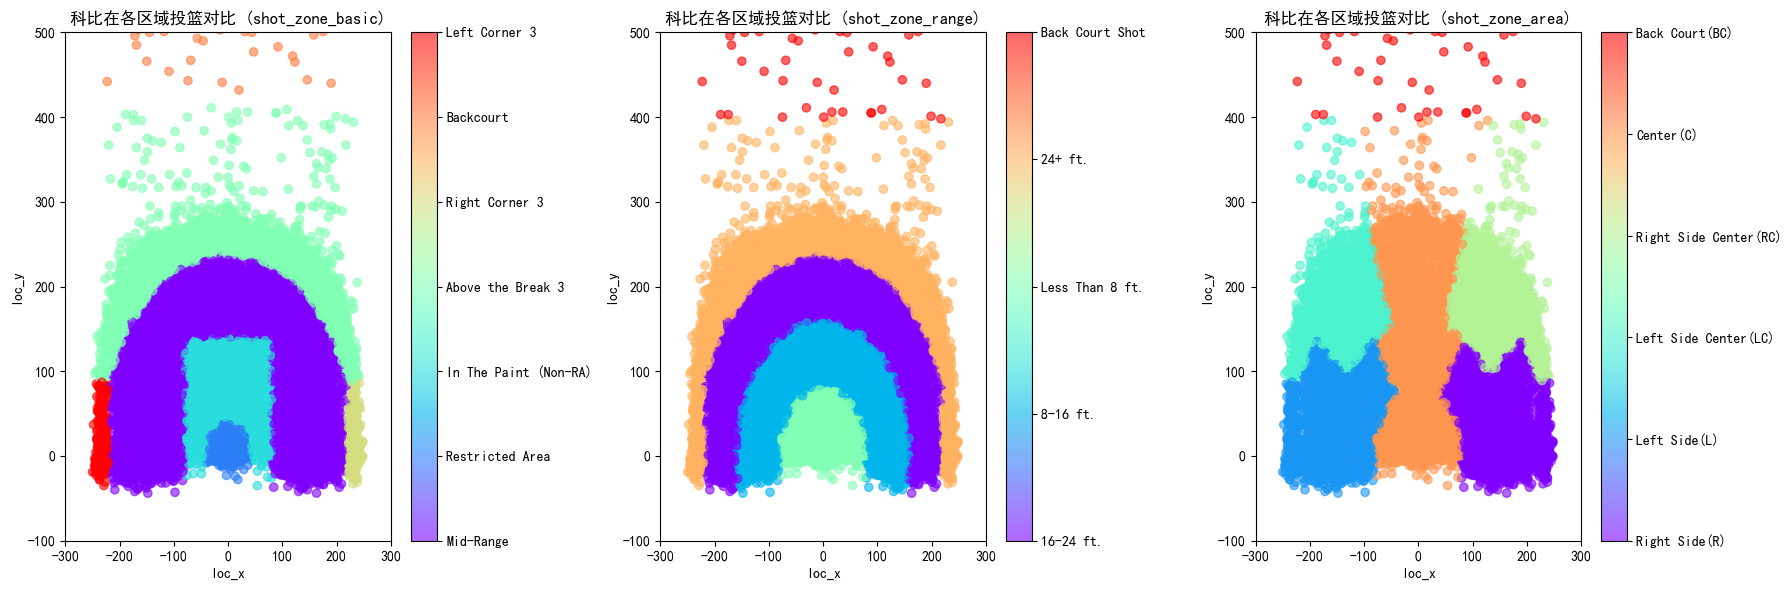

In [10]:
import matplotlib.pyplot as plt

# 创建三个子图
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# 第一个子图：shot_zone_basic
basic_codes, basic_uniques = pd.factorize(df['shot_zone_basic'])
axes[0].scatter(df['loc_x'], df['loc_y'], c=basic_codes, cmap='rainbow', alpha=0.6)
axes[0].set_title('科比在各区域投篮对比 (shot_zone_basic)')
axes[0].set_xlabel('loc_x')
axes[0].set_ylabel('loc_y')
axes[0].set_xlim(-300, 300)  # 设置合理的位置限制
axes[0].set_ylim(-100, 500)

# 添加颜色条
cbar0 = plt.colorbar(axes[0].collections[0], ax=axes[0])
cbar0.set_ticks(np.arange(len(basic_uniques)))
cbar0.set_ticklabels(basic_uniques)

# 第二个子图：shot_zone_range
range_codes, range_uniques = pd.factorize(df['shot_zone_range'])
axes[1].scatter(df['loc_x'], df['loc_y'], c=range_codes, cmap='rainbow', alpha=0.6)
axes[1].set_title('科比在各区域投篮对比 (shot_zone_range)')
axes[1].set_xlabel('loc_x')
axes[1].set_ylabel('loc_y')
axes[1].set_xlim(-300, 300)  # 设置合理的位置限制
axes[1].set_ylim(-100, 500)

# 添加颜色条
cbar1 = plt.colorbar(axes[1].collections[0], ax=axes[1])
cbar1.set_ticks(np.arange(len(range_uniques)))
cbar1.set_ticklabels(range_uniques)

# 第三个子图：shot_zone_area
area_codes, area_uniques = pd.factorize(df['shot_zone_area'])
axes[2].scatter(df['loc_x'], df['loc_y'], c=area_codes, cmap='rainbow', alpha=0.6)
axes[2].set_title('科比在各区域投篮对比 (shot_zone_area)')
axes[2].set_xlabel('loc_x')
axes[2].set_ylabel('loc_y')
axes[2].set_xlim(-300, 300)  # 设置合理的位置限制
axes[2].set_ylim(-100, 500)

# 添加颜色条
cbar2 = plt.colorbar(axes[2].collections[0], ax=axes[2])
cbar2.set_ticks(np.arange(len(area_uniques)))
cbar2.set_ticklabels(area_uniques)

# 调整显示
plt.tight_layout()
plt.show()


### 5. 科比在每一节的出手次数对比 
- 柱形图

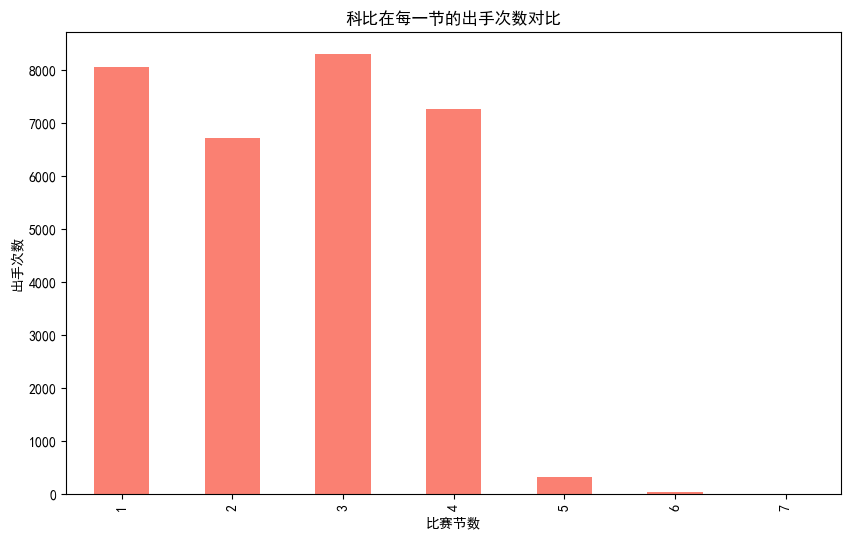

In [11]:
import matplotlib.pyplot as plt

# 统计科比在每一节的出手次数
shots_per_period = df['period'].value_counts().sort_index()

# 创建柱形图
plt.figure(figsize=(10, 6))
shots_per_period.plot(kind='bar', color='salmon')

# 设置标题和标签
plt.title('科比在每一节的出手次数对比')
plt.xlabel('比赛节数')
plt.ylabel('出手次数')

# 显示图形
plt.show()
